In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import sklearn.datasets
import sys
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions
from mpl_toolkits.mplot3d import Axes3D

In [2]:
df1 = pd.read_csv('Classify-3DwLabels-1.txt', sep=',', header=None, names=["Col1", "Col2", "Col3", "Class"])
df1.head()

,Col1,Col2,Col3,Class
0,-0.47,-0.21,0.64,1
1,-0.36,0.87,0.86,1
2,-0.87,0.71,-0.49,1
3,0.91,-0.83,0.24,0
4,0.90,0.06,-0.59,0


In [3]:
Column_1 = df1[['Col1']].to_numpy()
Column_2 = df1[['Col2']].to_numpy()
Column_3 = df1[['Col3']].to_numpy()
X = df1[['Col1', 'Col2', 'Col3']].to_numpy
y = df1[['Class']].to_numpy()

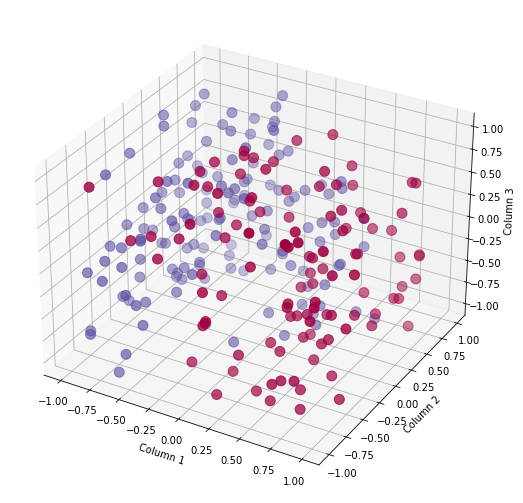

In [4]:
fig = plt.figure(figsize = (10,9))
ax = fig.add_subplot(projection='3d')

ax.scatter(Column_1, Column_2, Column_3, c=y, marker='o', s=100, cmap="Spectral")

ax.set_xlabel('Column 1')
ax.set_ylabel('Column 2')
ax.set_zlabel('Column 3')

plt.show()

In [5]:
X=df1[['Col1', 'Col2', 'Col3']].to_numpy()
y=df1[['Class']].to_numpy()

In [6]:
class Perceptron(object):
    def __init__(self, input_dim):
        self.weights = np.random.normal(loc=0.0, scale=1.0, size=input_dim)
        self.bias = np.random.normal(loc=0.0, scale=1.0, size=1)
    
    def activation(self, pred):
        return np.where(pred >= 0, 1, 0)
    
    def predict(self, data):
        return self.activation(np.dot(data, self.weights.T))
    
    def train(self, input_data, targets, epochs, lr=0.01):
        losses = []
        for e in range(1, epochs + 1):
            epoch_loss = 0
            for data, target in zip(input_data, targets):
                pred = self.predict(data)
                error = target - pred
                update = lr * error
                epoch_loss += error ** 2
                self.weights += update * data
                self.bias += update
            losses.append(epoch_loss)
            
            print(f"\rEpoch {e}/{epochs}, Loss : {epoch_loss}", end="")
            sys.stdout.flush()
            
        return losses

In [7]:
p = Perceptron(input_dim=3)
losses = p.train(X,y, epochs=16)

Epoch 16/16, Loss : [0]

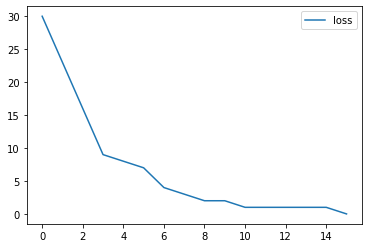

In [8]:
plt.plot(losses, label="loss")
plt.legend()
plt.show()

In [27]:
w1 = p.weights[0]
w2 = p.weights[1]
w3 = p.weights[2]
b = p.bias

In [28]:
a,b,c,d = w1,w2,w3,b

In [29]:
x_min = Column_1.min()
x_max = Column_1.max()

x = np.linspace(x_min, x_max, 100)

y_min = Column_2.min()
y_max = Column_2.max()

y = np.linspace(y_min, y_max, 100)

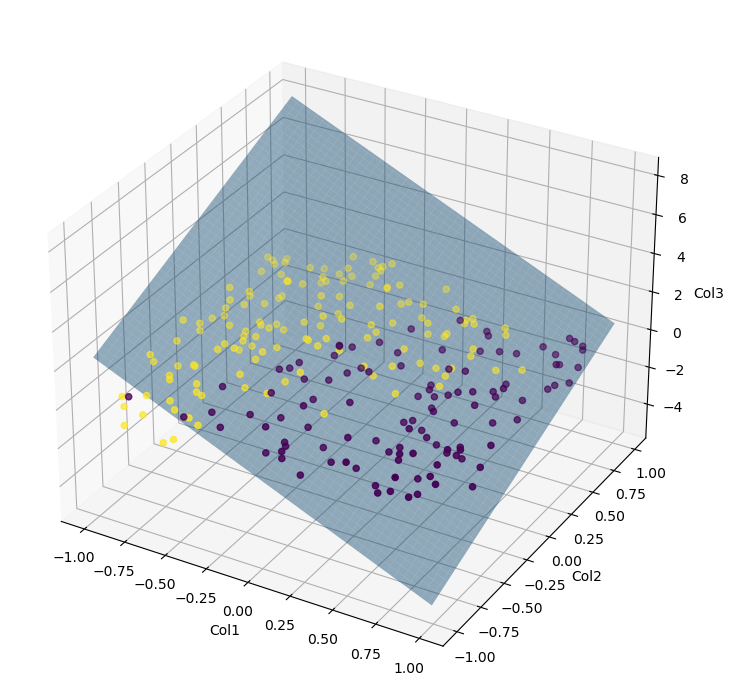

In [33]:
Xs,Ys = np.meshgrid(x,y)
Zs = (-d-a*Xs-b*Ys)/c


#visualize 3d scatterplot with hyperplane
fig = plt.figure(num=None, figsize=(9, 9), dpi=100, facecolor='w', edgecolor='k')
ax2 = fig.add_subplot(111, projection='3d')

ax2.plot_surface(Xs, Ys, Zs, alpha=0.45)

ax2.scatter(df1[['Col1']], df1[['Col2']], df1[['Col3']], c=df1[['Class']])

ax2.set_xlabel('Col1')
ax2.set_ylabel('Col2')
ax2.set_zlabel('Col3')
plt.show()